# K-Nearest Neighbors (Javascript Prediction)

## Penjelasan

### Tujuan

Memprediksi huruf Aksara Jawa berdasarkan kolom fitur Zoning 1-16. Menggunakan model KNN (K-Nearest Neighbors) untuk mencari nilai zoning terdekat 

### Kolom

- No = Nomor Urut Setiap Huruf Aksara Jawa
- Huruf = Huruf Aksara Jawa
- Z1 - Z16 = Ekstraksi Zoning dari Huruf Aksara Jawa

![Zoning Aksara](aksara.png)

## A. Data Preparation

### A.1 Import Libraries

In [1026]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [1027]:
try:
    df = pd.read_excel('datanolabel.xlsx', sheet_name='Training', na_values=[], keep_default_na=False)
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [1028]:
df.head()

,No,HURUF,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16
0,1,HA,274,72,222,170,160,180,105,138,110,214,104,131,105,242,114,123
1,1,HA,114,3,77,87,56,51,104,94,56,45,164,61,36,92,110,31
2,1,HA,279,182,348,286,322,191,170,181,316,157,203,179,300,302,185,176
3,1,HA,92,53,202,117,67,76,153,83,66,75,146,78,56,142,90,60
4,1,HA,280,35,255,191,155,153,218,163,131,237,207,160,103,264,117,133


In [1029]:
df.tail()

,No,HURUF,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16
445,20,NGA,121,86,57,180,75,76,0,80,84,79,0,77,57,52,101,84
446,20,NGA,132,156,173,246,131,125,89,128,115,120,0,119,46,141,131,106
447,20,NGA,173,0,184,236,150,106,0,104,110,132,2,113,60,109,46,102
448,20,NGA,52,105,339,159,101,116,61,124,101,117,0,125,96,294,86,113
449,20,NGA,107,0,326,199,205,9,64,142,265,5,197,131,172,234,215,96


### A.4 Melihat Dimensi Data

In [1030]:
df.shape

(450, 18)

### A.5 Melihat Informasi Data

In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      450 non-null    int64 
 1   HURUF   450 non-null    object
 2   Z1      450 non-null    int64 
 3   Z2      450 non-null    int64 
 4   Z3      450 non-null    int64 
 5   Z4      450 non-null    int64 
 6   Z5      450 non-null    int64 
 7   Z6      450 non-null    int64 
 8   Z7      450 non-null    int64 
 9   Z8      450 non-null    int64 
 10  Z9      450 non-null    int64 
 11  Z10     450 non-null    int64 
 12  Z11     450 non-null    int64 
 13  Z12     450 non-null    int64 
 14  Z13     450 non-null    int64 
 15  Z14     450 non-null    int64 
 16  Z15     450 non-null    int64 
 17  Z16     450 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 63.4+ KB


### A.6 Cek Data Duplikat

In [1032]:
df.duplicated().sum()

np.int64(1)

In [1033]:
df.drop_duplicates(inplace=True)

### A.7 Cek Data Hilang

In [1034]:
df.isna().sum()

No       0
HURUF    0
Z1       0
Z2       0
Z3       0
Z4       0
Z5       0
Z6       0
Z7       0
Z8       0
Z9       0
Z10      0
Z11      0
Z12      0
Z13      0
Z14      0
Z15      0
Z16      0
dtype: int64

### A.8 Cek Nilai Unique Data Target

In [1035]:
df['HURUF'].unique()

array(['HA', 'NA', 'CA', 'RA', 'KA', 'DA', 'LA', 'TA', 'SA', 'WA', 'PA',
       'DHA', 'JA', 'YA', 'NYA', 'MA', 'GA', 'BA', 'THA', 'NGA'],
      dtype=object)

### A.9 Cek Persebaran Data Target

In [1036]:
df['HURUF'].value_counts()

HURUF
NA     24
HA     23
CA     23
RA     23
KA     23
DA     23
LA     23
TA     23
SA     23
WA     22
PA     22
DHA    22
JA     22
YA     22
NYA    22
MA     22
GA     22
THA    22
NGA    22
BA     21
Name: count, dtype: int64

### A.10 Cek Statistik Data

In [1037]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
No,449.00,10.15,5.86,1.00,5.00,9.00,15.00,20.00
Z1,449.00,167.47,89.98,0.00,100.00,151.00,232.00,528.00
Z2,449.00,117.35,93.60,0.00,49.00,91.00,166.00,504.00
Z3,449.00,160.09,102.69,0.00,81.00,149.00,225.00,457.00
Z4,449.00,202.43,86.34,0.00,140.00,189.00,252.00,599.00
Z5,449.00,122.98,72.91,0.00,71.00,110.00,163.00,427.00
Z6,449.00,127.28,77.75,0.00,73.00,117.00,167.00,537.00
Z7,449.00,107.21,82.98,0.00,47.00,102.00,156.00,403.00
Z8,449.00,150.65,67.42,0.00,104.00,142.00,194.00,366.00
Z9,449.00,119.59,73.01,0.00,73.00,105.00,159.00,423.00


### A.11 Cek Nilai Outliers

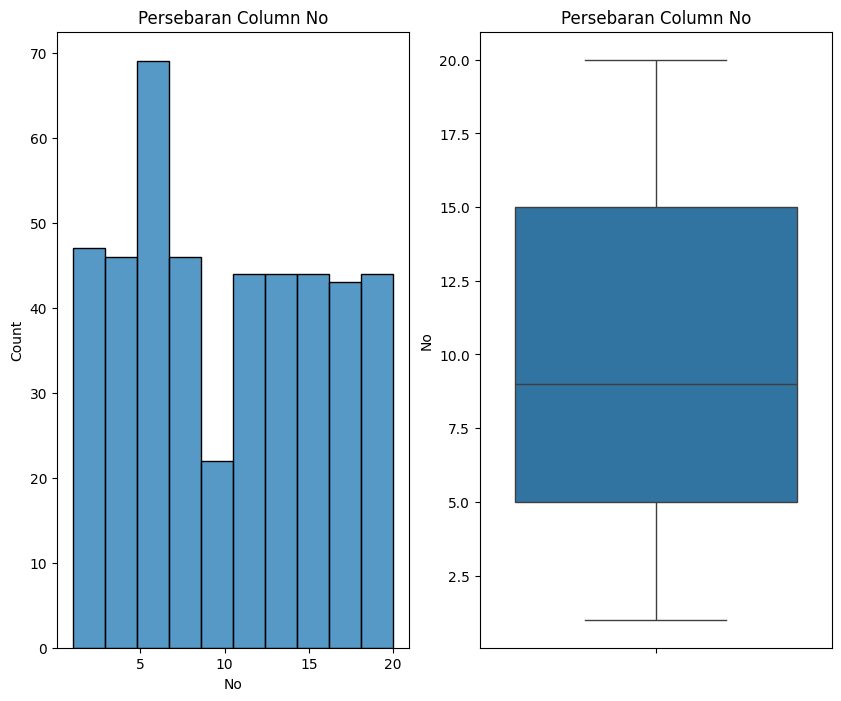

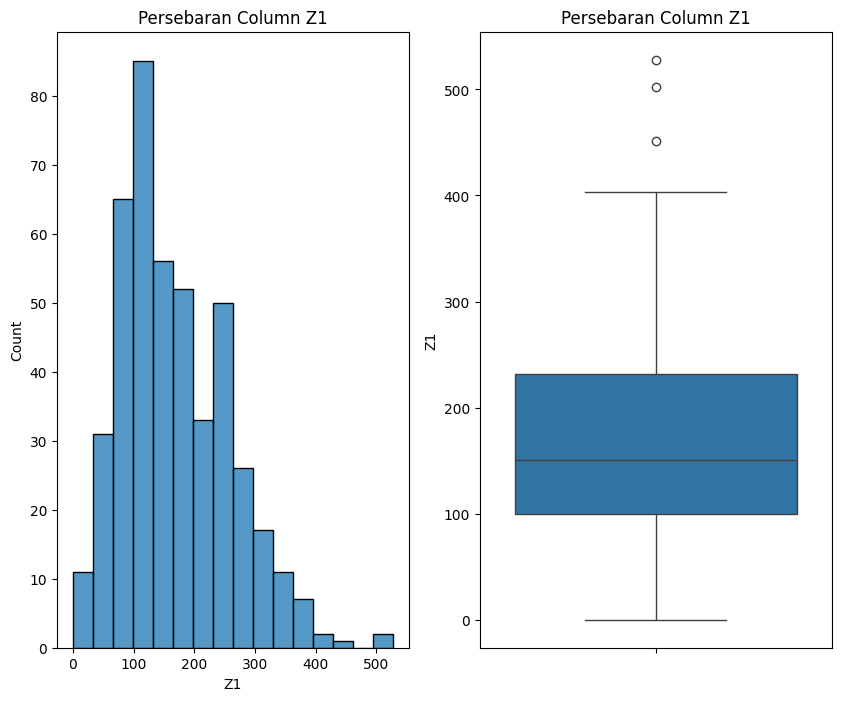

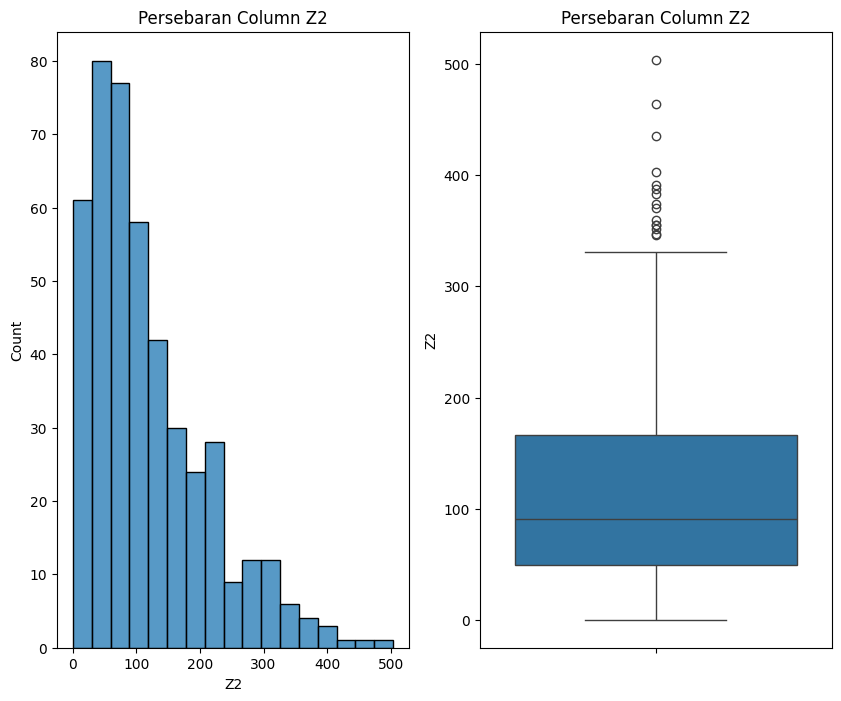

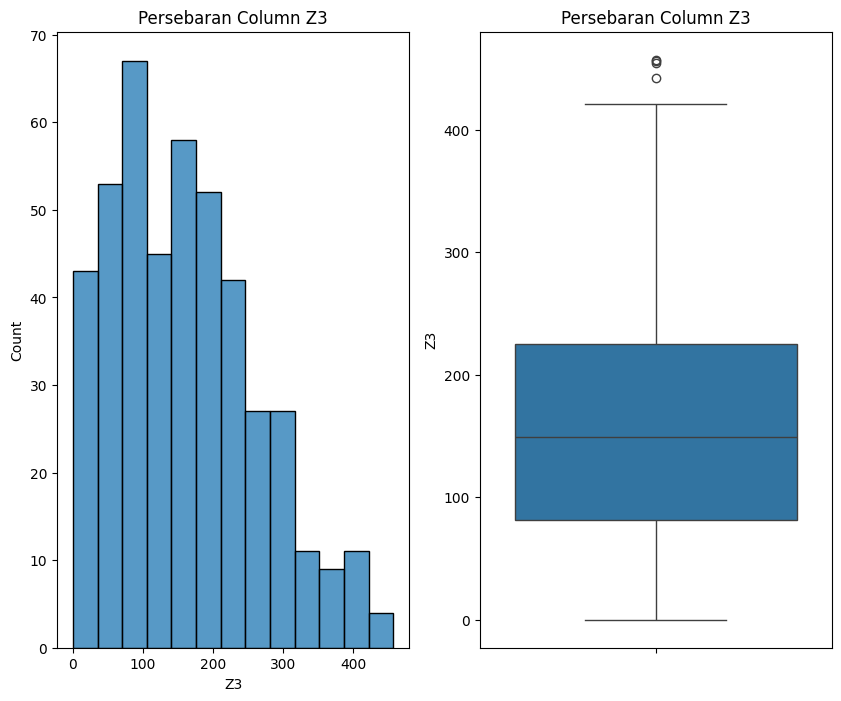

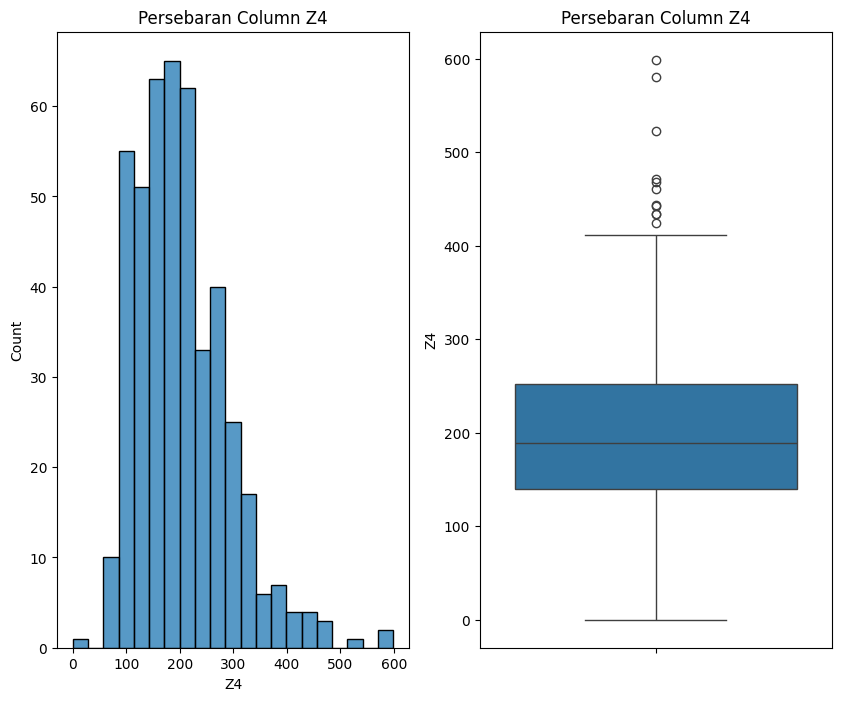

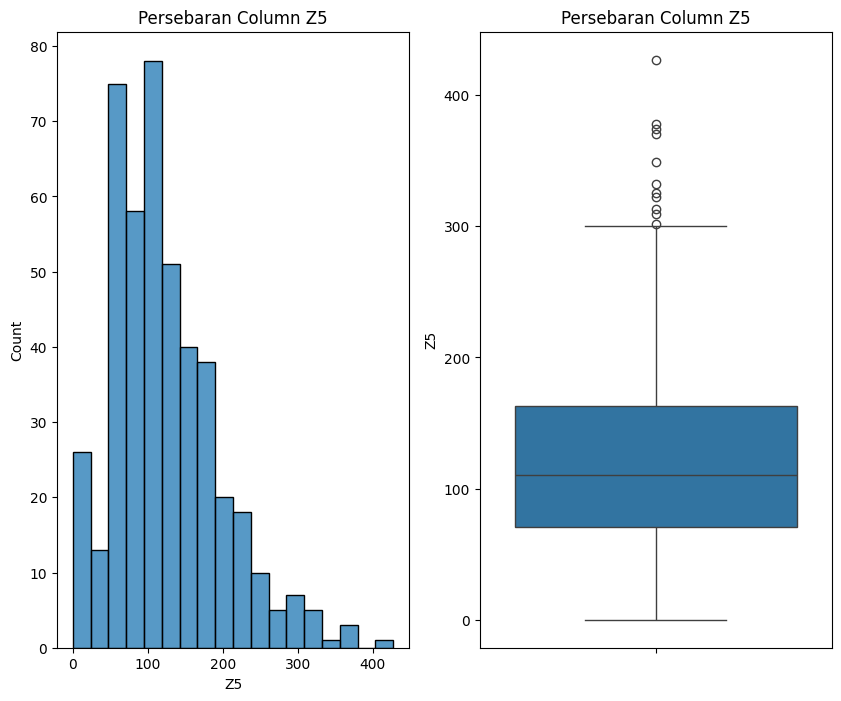

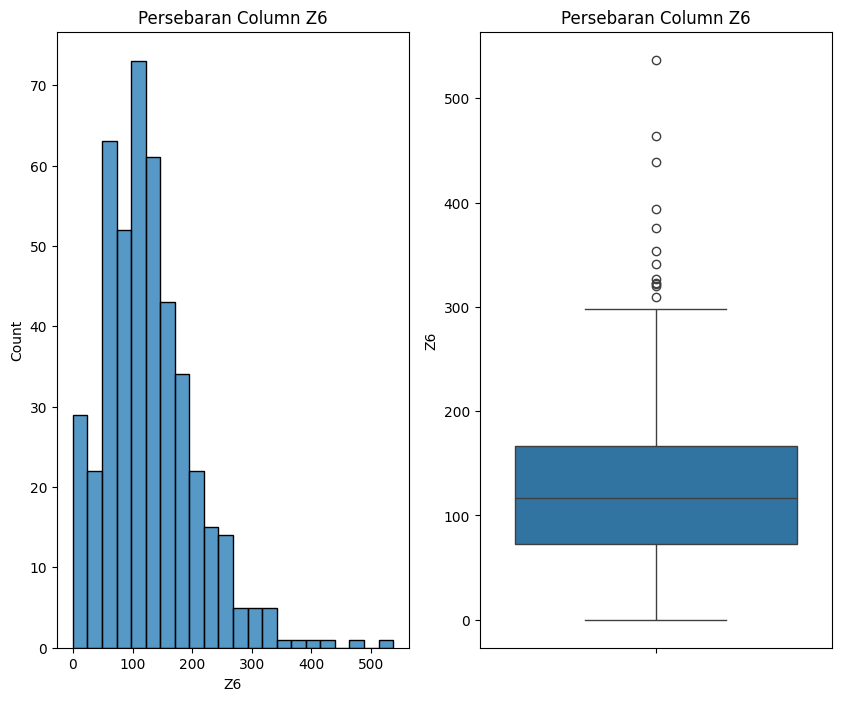

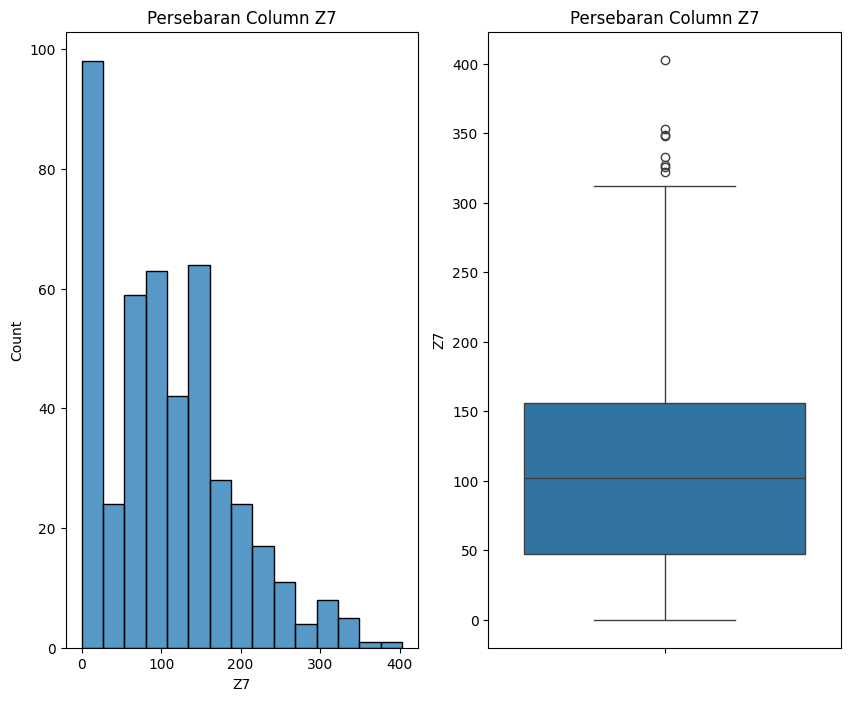

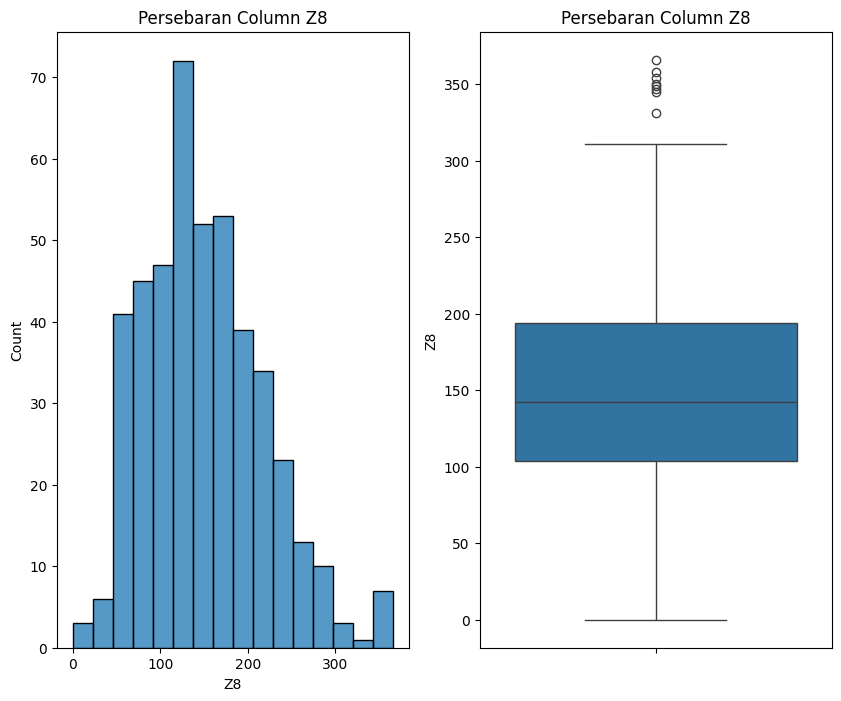

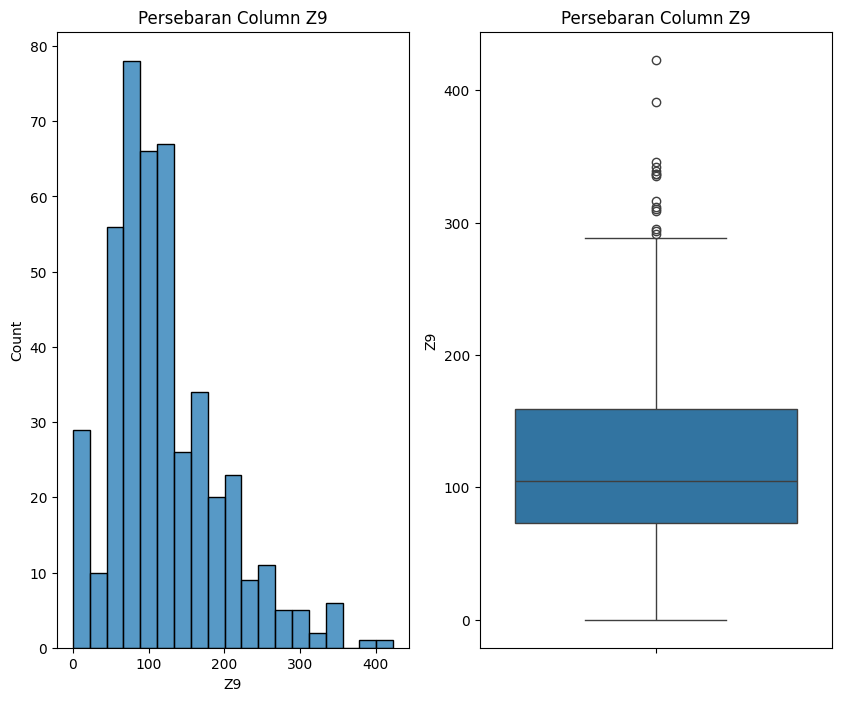

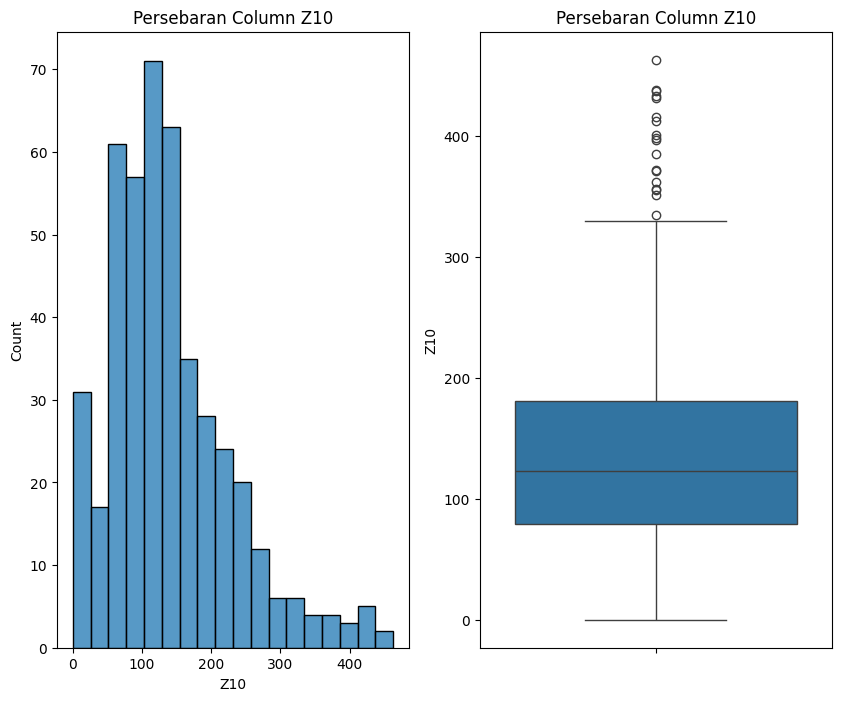

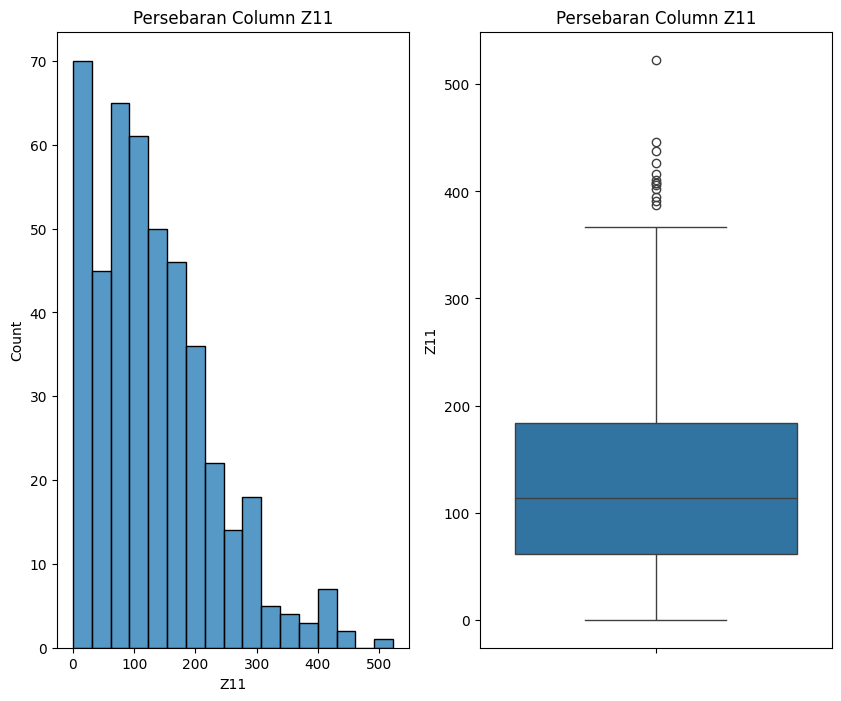

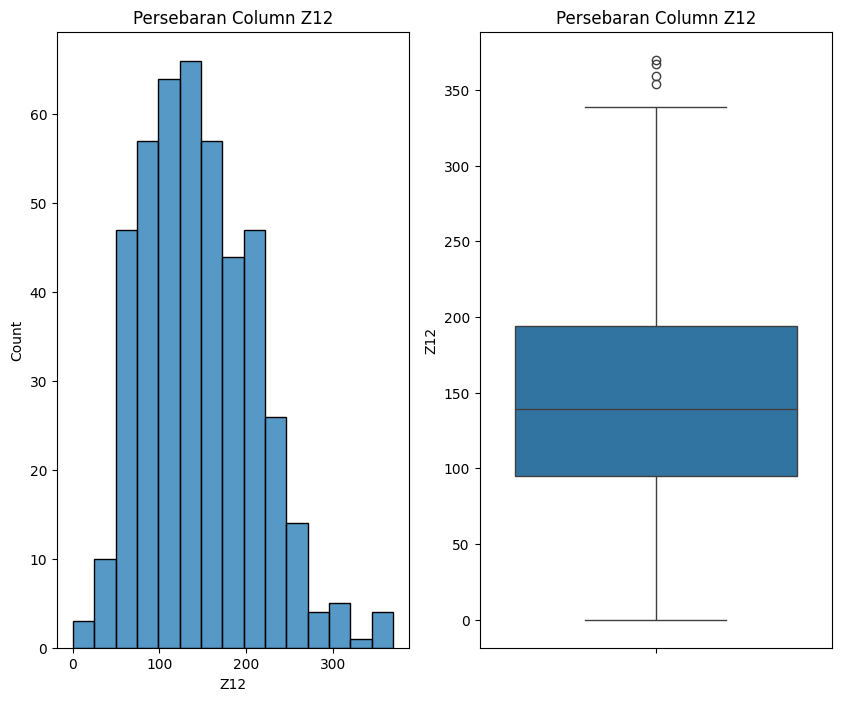

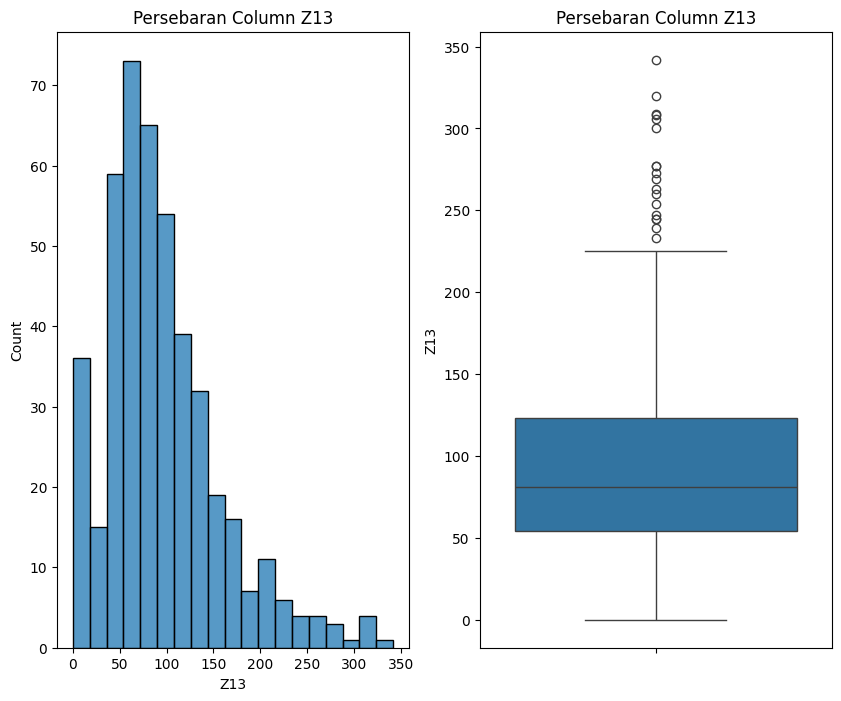

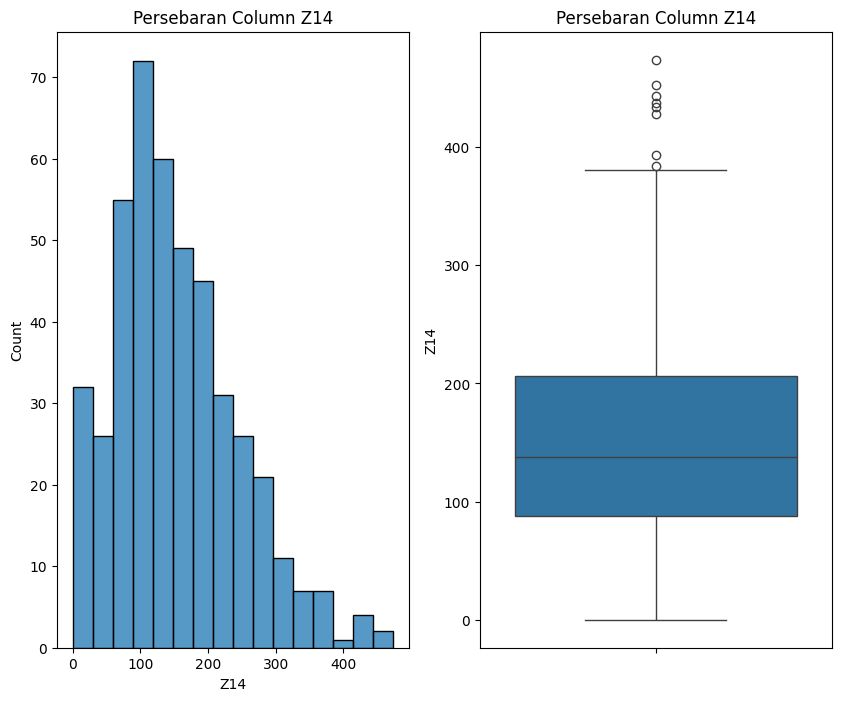

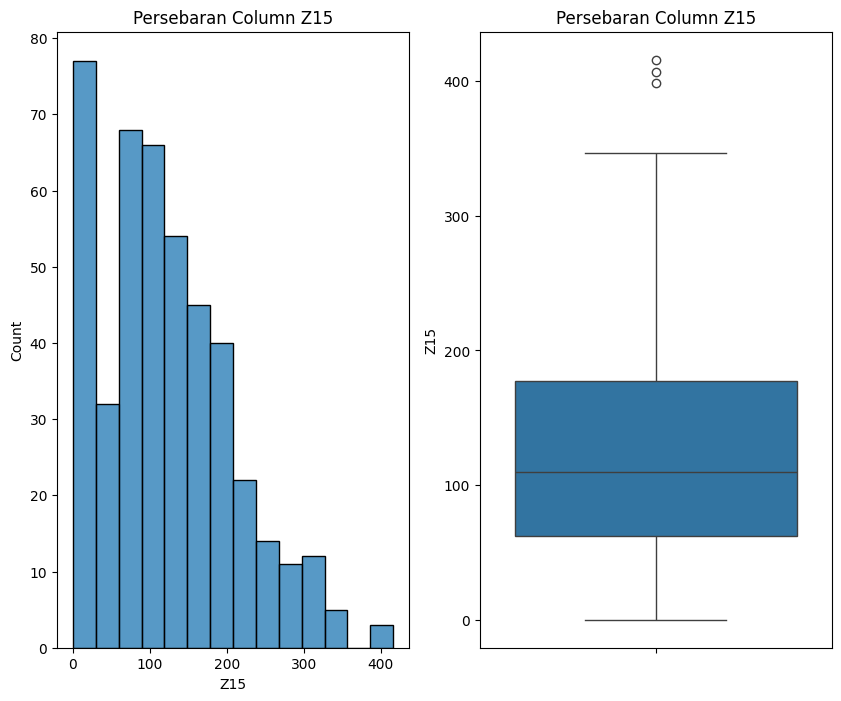

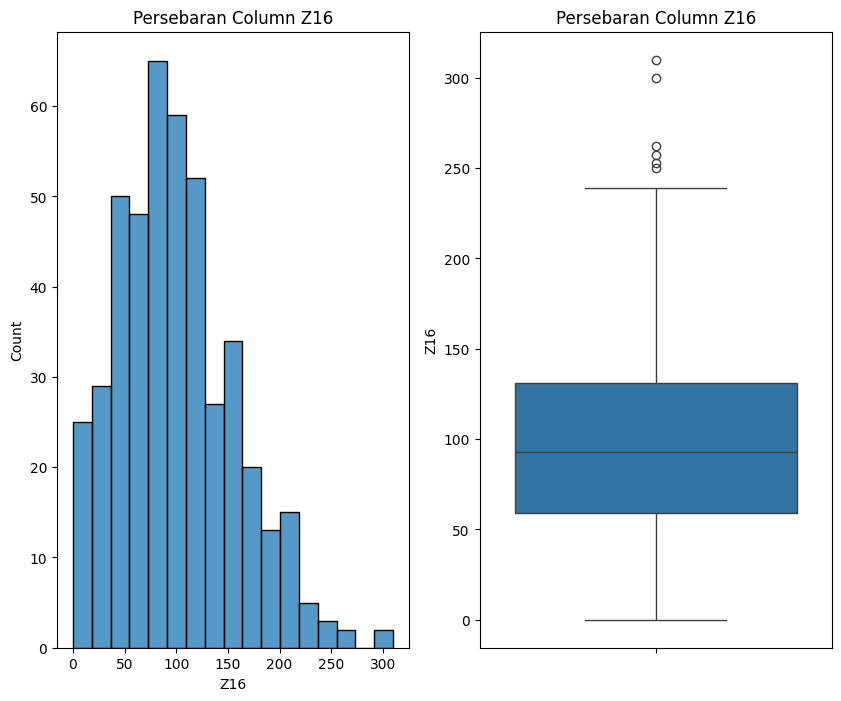

In [1038]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 8))
    
    sns.histplot(df[col], ax = axes[0])
    axes[0].set_title(f"Persebaran Column {col}")
    
    sns.boxplot(df[col], ax = axes[1])
    axes[1].set_title(f"Persebaran Column {col}")

## B. Data Preprocessing

### B.1 Label Encoding

In [1039]:
# aksara_mapping = {'HA' : 0, 'NA' : 1, 'CA' : 2, 'RA' : 3, 'KA' : 4, 'DA' : 5, 'TA' : 6, 'SA' : 7, 'WA' : 8, 'LA' : 9 ,'PA' : 10, 'DHA' : 11,
#                   'JA' : 12, 'YA' : 13, 'NYA' : 14, 'MA' : 15, 'GA' : 16, 'BA' : 17, 'THA' : 18, 'NGA' : 19}

# # aksara_mapping = {'HA' : 0, 'CA' : 1, 'RA' : 2, 'KA' : 3, 'DA' : 4, 'TA' : 5, 'SA' : 6, 'WA' : 7, 'LA' : 8,'PA' : 9, 'DHA' : 10,
# #                   'JA' : 11, 'YA' : 12, 'NYA' : 13, 'MA' : 14, 'GA' : 15, 'BA' : 16, 'THA' : 17, 'NGA' : 18}

# df['HURUF'] = df['HURUF'].map(aksara_mapping)
# # df['HURUF'] = df['HURUF'].astype('category').cat.codes

### B.2 Drop Columns "No"

In [1040]:
df = df.drop(columns='No')

## C. Explotatory Data Analysis (EDA)

### C.1 Univariate Analysis

Text(0.5, 1.0, 'Persebaran Columns Target')

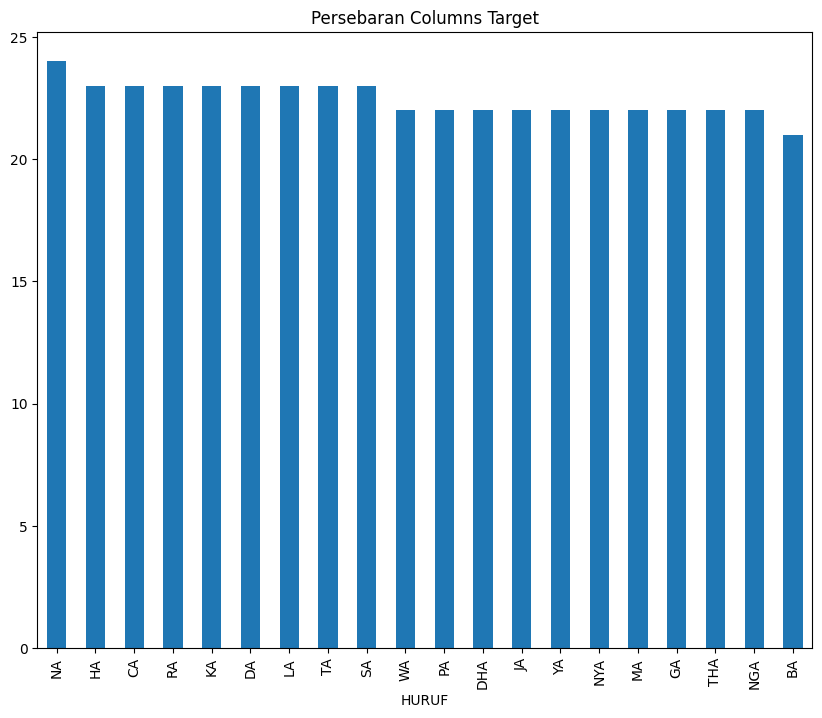

In [1041]:
df['HURUF'].value_counts().plot(kind='bar', figsize=(10, 8)).set_title("Persebaran Columns Target")

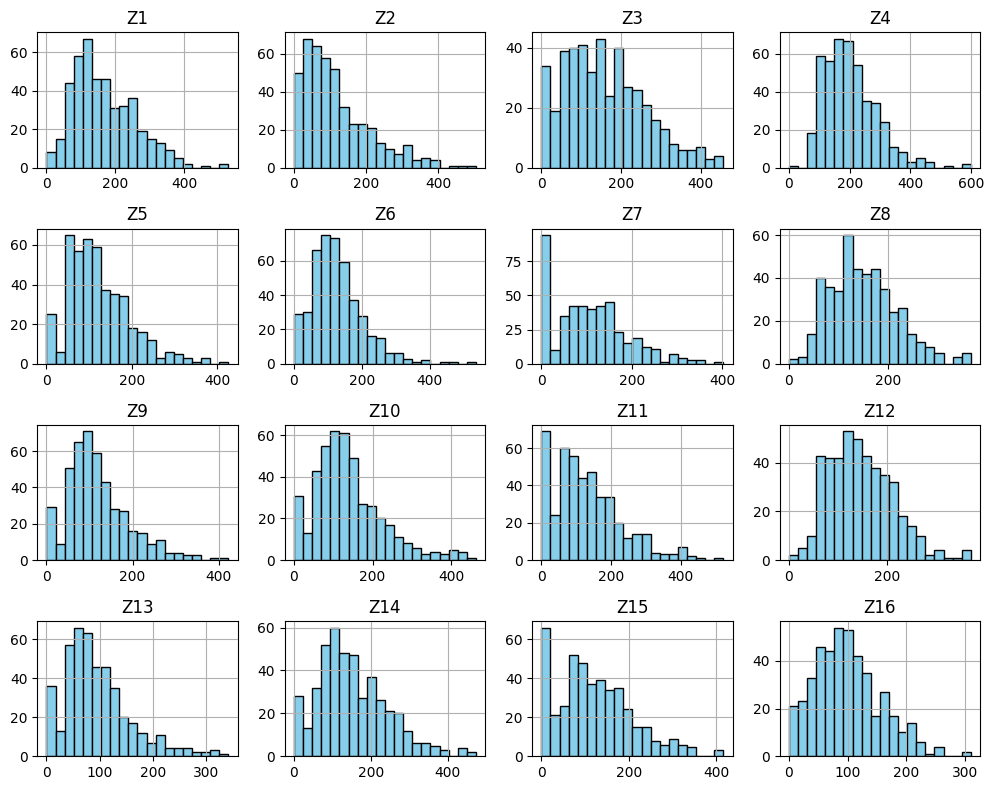

In [1042]:
num = df.select_dtypes(include='number')
num.hist(bins=20, edgecolor='black', color='skyblue', figsize=(10, 8))
plt.tight_layout()

<Axes: >

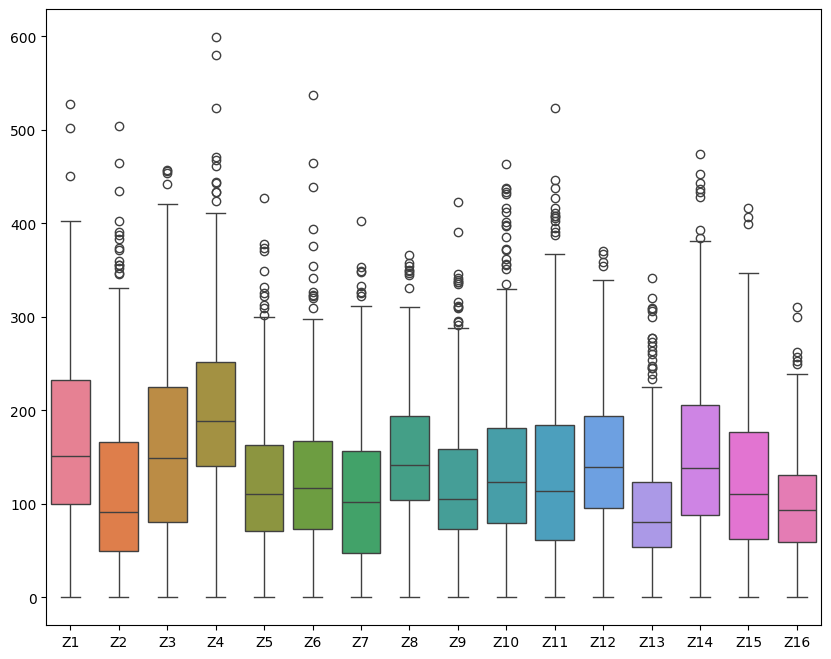

In [1043]:
plt.figure(figsize=(10, 8))
sns.boxplot(num)

### C.2 Bivariate Analysis

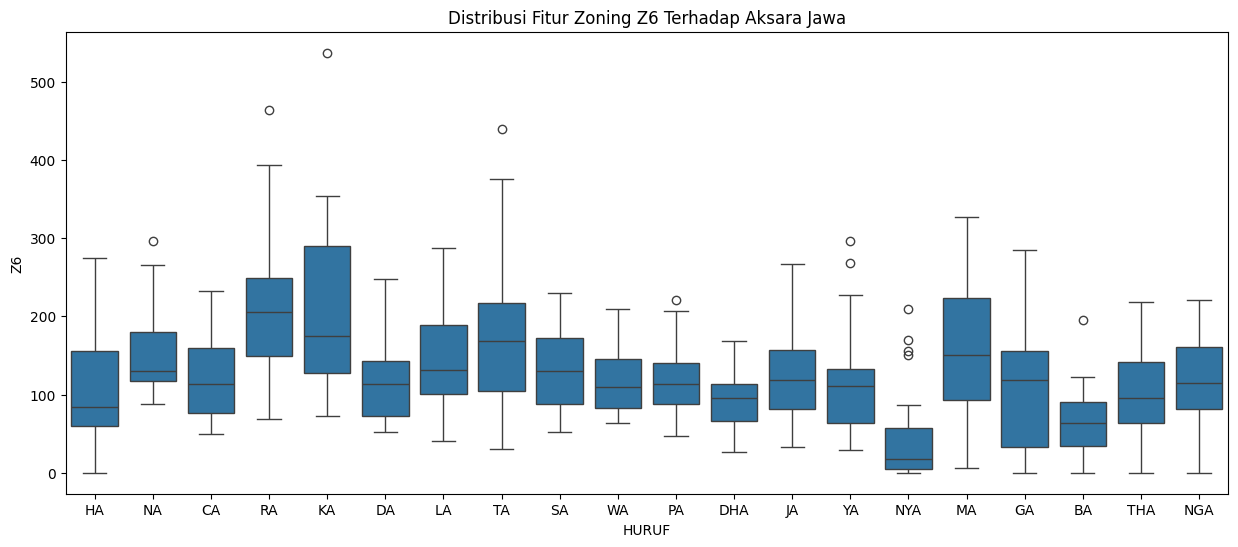

In [1044]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='HURUF', y='Z6')
plt.title("Distribusi Fitur Zoning Z6 Terhadap Aksara Jawa")
plt.show()

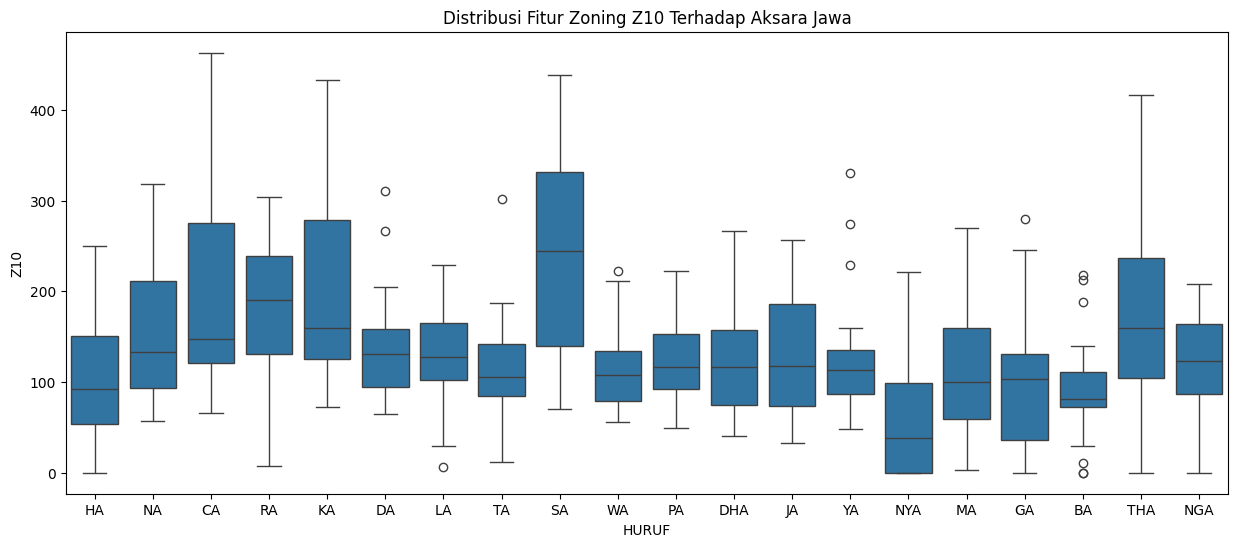

In [1045]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='HURUF', y='Z10')
plt.title("Distribusi Fitur Zoning Z10 Terhadap Aksara Jawa")
plt.show()

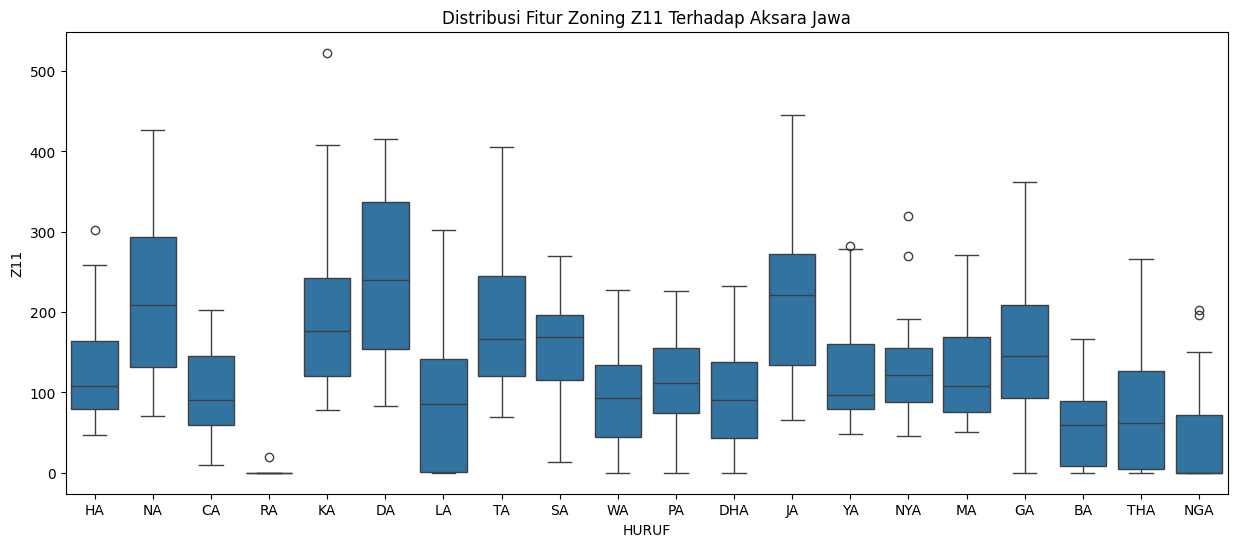

In [1046]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='HURUF', y='Z11')
plt.title("Distribusi Fitur Zoning Z11 Terhadap Aksara Jawa")
plt.show()

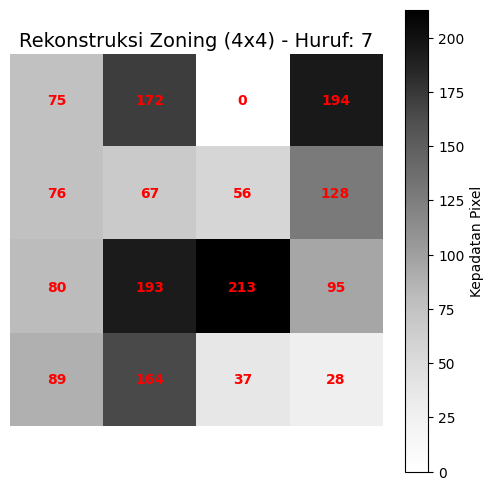

In [1079]:
row = df.iloc[200]
huruf = row['HURUF']
z_values = row.loc['Z1':'Z16'].values.astype(float)

z_matrix = z_values.reshape(4, 4)
plt.figure(figsize=(6, 6))
plt.imshow(z_matrix, cmap='Greys', interpolation='nearest')

plt.colorbar(label='Kepadatan Pixel')
plt.title(f"Rekonstruksi Zoning (4x4) - Huruf: {huruf}", fontsize=14)

for i in range(4):
    for j in range(4):
        plt.text(j, i, int(z_matrix[i, j]), 
                 ha="center", va="center", color="red", fontweight='bold')

plt.axis('off')
plt.show()

### C.3 Multivariate Analysis

In [1048]:
aksara_mapping = {'HA' : 0, 'NA' : 1, 'CA' : 2, 'RA' : 3, 'KA' : 4, 'DA' : 5, 'TA' : 6, 'SA' : 7, 'WA' : 8, 'LA' : 9 ,'PA' : 10, 'DHA' : 11,
                  'JA' : 12, 'YA' : 13, 'NYA' : 14, 'MA' : 15, 'GA' : 16, 'BA' : 17, 'THA' : 18, 'NGA' : 19}

df['HURUF'] = df['HURUF'].map(aksara_mapping)


# aksara_mapping = {'HA' : 0, 'CA' : 1, 'RA' : 2, 'KA' : 3, 'DA' : 4, 'TA' : 5, 'SA' : 6, 'WA' : 7, 'LA' : 8,'PA' : 9, 'DHA' : 10,
#                   'JA' : 11, 'YA' : 12, 'NYA' : 13, 'MA' : 14, 'GA' : 15, 'BA' : 16, 'THA' : 17, 'NGA' : 18}
# df['HURUF'] = df['HURUF'].astype('category').cat.codes

<Axes: >

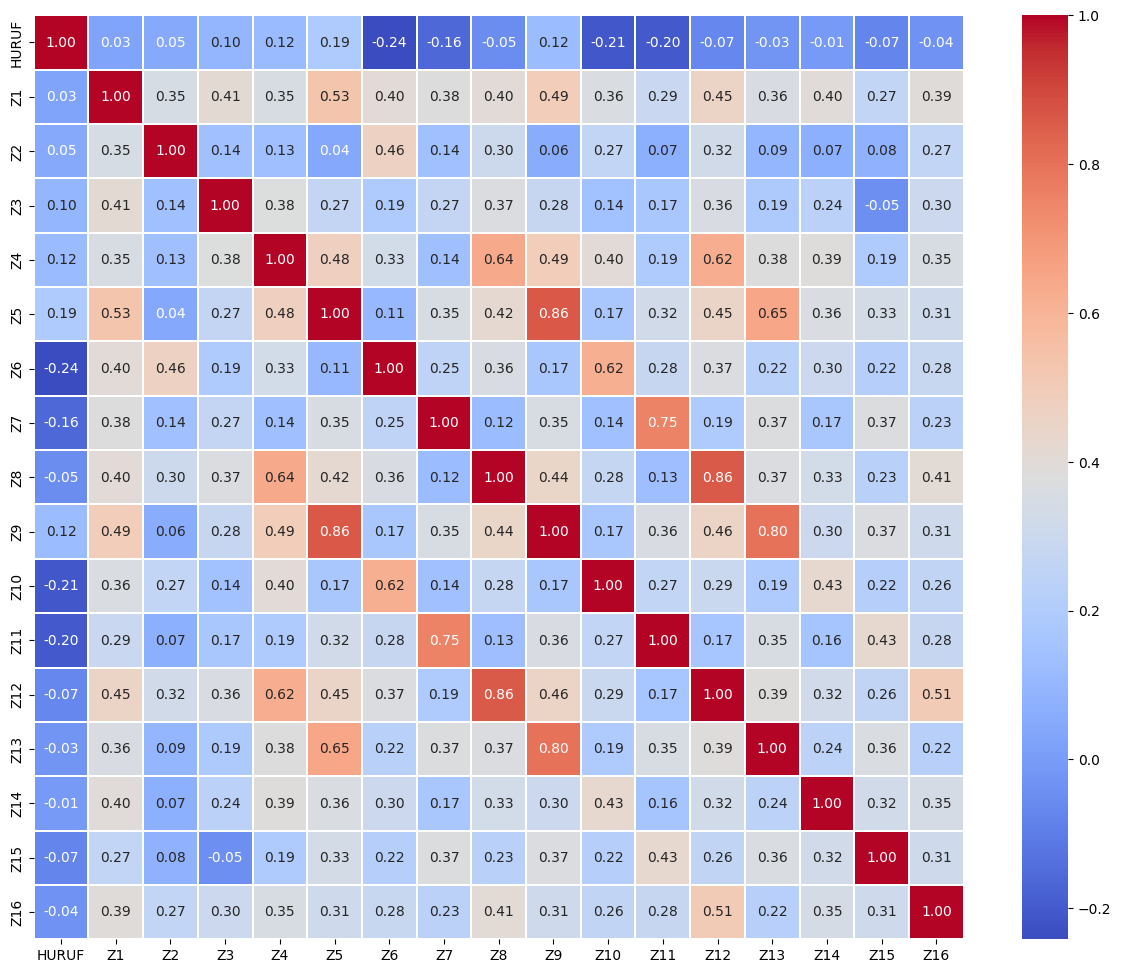

In [1049]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=1.1,
            fmt=".2f",
            cmap='coolwarm')

## D. Modelling

### D.1 Standarisasi

In [1050]:
features = df.drop(columns='HURUF')
target = df['HURUF']

<Axes: >

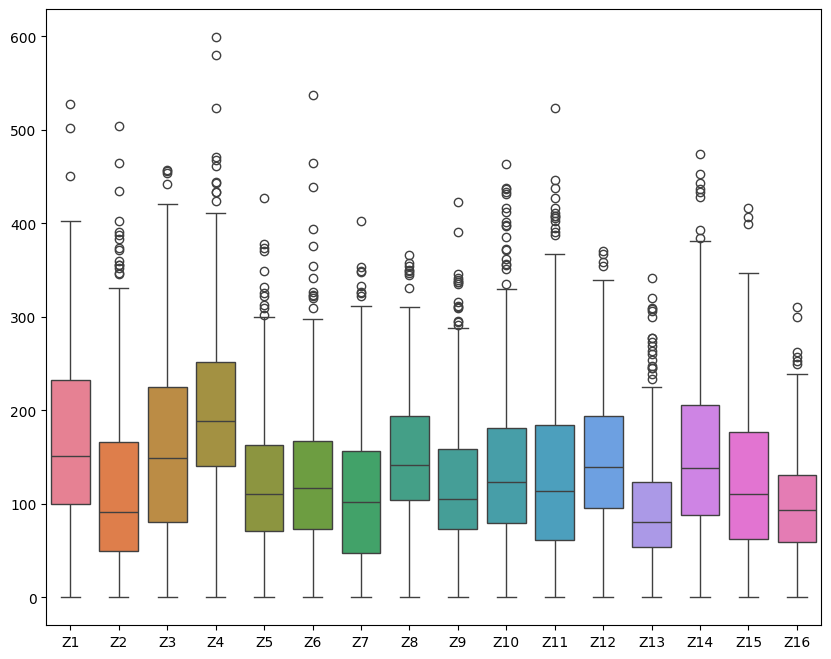

In [1051]:
plt.figure(figsize=(10, 8))
sns.boxplot(features)

In [1052]:
# features = (features - features.mean(axis=0)) / features.std(axis=0)

### D.2 Normalisasi

In [1053]:
features = (features - features.min()) / (features.max() - features.min())

<Axes: >

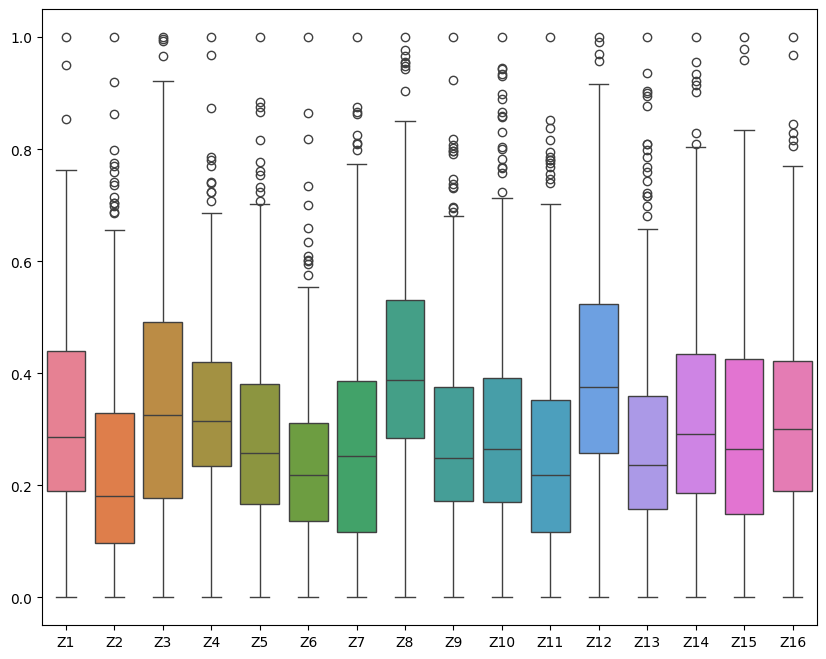

In [1054]:
plt.figure(figsize=(10, 8))
sns.boxplot(features)

### D.3 Defining X (Features) and y (Target) Variables

In [1055]:
X_data = features
y_data = target

### D.4 Splitting Data Train and Data Test (80:20)

In [1056]:
def stratified_split(x_data, y_data, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(x_data.iloc[idx[:split_ratio]])
        x_test_list.append(x_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop = True)
    x_test = pd.concat(x_test_list).reset_index(drop = True)
    y_train = pd.concat(y_train_list).reset_index(drop = True)
    y_test = pd.concat(y_test_list).reset_index(drop = True)
    
    return x_train, x_test, y_train, y_test
X_train, X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.5 K-Nearest Neighbors

In [1057]:
class KNN:
    def __init__(self, k, p, weights):
        self.K = k
        self.P = p
        self.weights = weights
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def jarak(self, x1, x2):
        #Manhattan
        if self.P == 1:
            return np.sum(np.abs(x1 - x2))
        #Euclidean
        elif self.P == 2:
            return np.sqrt(np.sum((x1 - x2) ** 2))
        #Chebyshev
        elif self.P == float('inf') or self.P == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        #Minkowski
        else:
            return np.power(np.sum(np.abs(x1 - x2) ** self.P), 1/self.P)
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        jaraks = [self.jarak(x, x_train) for x_train in self.X_train]
        best_k = np.argsort(jaraks)[:self.K]
        label_k = [self.y_train[i] for i in best_k]
        
        if self.weights == 'uniform':
            hasil = max(set(label_k), key=label_k.count)
            return hasil
            
        elif self.weights == 'distance':
            dist_k = [jaraks[i] for i in best_k]
            vote_scores = {}
            
            for label, dist in zip(label_k, dist_k):
                # Rumus: 1 / jarak 
                # (Ditambah 1e-6 biar kalau jaraknya 0 nggak error division by zero)
                weight = 1 / (dist + 1e-6)
                
                # Masukkan ke dictionary manual
                if label in vote_scores:
                    vote_scores[label] += weight
                else:
                    vote_scores[label] = weight
            
            hasil = max(vote_scores, key=vote_scores.get)
            return hasil

### D.6 Grid-Search (Finding Optimal K and Distance)

#### Grid Search Test Prediction

In [1058]:
print("|   K   |   Jarak   |  Akurasi  |    Weights    |")

best_acc = 0
best_params = {}

for k in [3, 5, 7, 9, 11, 13, 15]:
    for p in [1, 2, 'chebyshev']:
        for w in ['uniform', 'distance']:
            model = KNN(k, p, w)
            model.train(X_train.values, y_train.values)
            pred = model.predict(X_test.values)
            acc = np.mean(pred == y_test.values)
            
            if p == 1:
                jarak = "Manhattan"
            elif p == 2:
                jarak = "Euclidean"
            else:
                jarak = "Chebyshev"

            print(f"|   {k}   | {jarak} |    {acc:.2f}   |    {w}    |")
            if acc > best_acc:
                best_acc = acc
                best_params = {'k' : k, 'p' : p, 'w': w}
            
if best_params['p'] == 1:
    nama_jarak = "Manhattan"
elif best_params['p'] == 2:
    nama_jarak = "Euclidean"
else:
    nama_jarak = "Chebyshev"
print(f"Best K: {best_params['k']} | Best Distance: {nama_jarak} | Best Accuracy: {best_acc} | Best W: {best_params['w']}")

|   K   |   Jarak   |  Akurasi  |    Weights    |
|   3   | Manhattan |    0.39   |    uniform    |
|   3   | Manhattan |    0.41   |    distance    |
|   3   | Euclidean |    0.35   |    uniform    |
|   3   | Euclidean |    0.42   |    distance    |
|   3   | Chebyshev |    0.28   |    uniform    |
|   3   | Chebyshev |    0.37   |    distance    |
|   5   | Manhattan |    0.31   |    uniform    |
|   5   | Manhattan |    0.36   |    distance    |
|   5   | Euclidean |    0.36   |    uniform    |
|   5   | Euclidean |    0.40   |    distance    |
|   5   | Chebyshev |    0.26   |    uniform    |
|   5   | Chebyshev |    0.35   |    distance    |
|   7   | Manhattan |    0.33   |    uniform    |
|   7   | Manhattan |    0.37   |    distance    |
|   7   | Euclidean |    0.37   |    uniform    |
|   7   | Euclidean |    0.38   |    distance    |
|   7   | Chebyshev |    0.28   |    uniform    |
|   7   | Chebyshev |    0.33   |    distance    |
|   9   | Manhattan |    0.30   |    unif

#### Grid Search Train Prediction

In [1059]:
print("|   K   |   Jarak   |  Akurasi  |    Weights    |")

best_acc = 0
best_params = {}

for k in [3, 5, 7, 9, 11, 13, 15]:
    for p in [1, 2, 'chebyshev']:
        for w in ['uniform', 'distance']:
            model = KNN(k, p, w)
            model.train(X_train.values, y_train.values)
            pred = model.predict(X_train.values)
            acc = np.mean(pred == y_train.values)
            
            if p == 1:
                jarak = "Manhattan"
            elif p == 2:
                jarak = "Euclidean"
            else:
                jarak = "Chebyshev"

            print(f"|   {k}   | {jarak} |    {acc:.2f}   |    {w}    |")
            if acc > best_acc:
                best_acc = acc
                best_params = {'k' : k, 'p' : p, 'w': w}
            
if best_params['p'] == 1:
    nama_jarak = "Manhattan"
elif best_params['p'] == 2:
    nama_jarak = "Euclidean"
else:
    nama_jarak = "Chebyshev"
print(f"Best K: {best_params['k']} | Best Distance: {nama_jarak} | Best Accuracy: {best_acc} | Best W: {best_params['w']}")

|   K   |   Jarak   |  Akurasi  |    Weights    |
|   3   | Manhattan |    0.60   |    uniform    |
|   3   | Manhattan |    1.00   |    distance    |
|   3   | Euclidean |    0.62   |    uniform    |
|   3   | Euclidean |    1.00   |    distance    |
|   3   | Chebyshev |    0.59   |    uniform    |
|   3   | Chebyshev |    1.00   |    distance    |
|   5   | Manhattan |    0.58   |    uniform    |
|   5   | Manhattan |    1.00   |    distance    |
|   5   | Euclidean |    0.59   |    uniform    |
|   5   | Euclidean |    1.00   |    distance    |
|   5   | Chebyshev |    0.52   |    uniform    |
|   5   | Chebyshev |    1.00   |    distance    |
|   7   | Manhattan |    0.55   |    uniform    |
|   7   | Manhattan |    1.00   |    distance    |
|   7   | Euclidean |    0.52   |    uniform    |
|   7   | Euclidean |    1.00   |    distance    |
|   7   | Chebyshev |    0.52   |    uniform    |
|   7   | Chebyshev |    1.00   |    distance    |
|   9   | Manhattan |    0.54   |    unif

### D.7 Elbow Method Uniform (Checking Optimal K)

#### Euclidean Distance

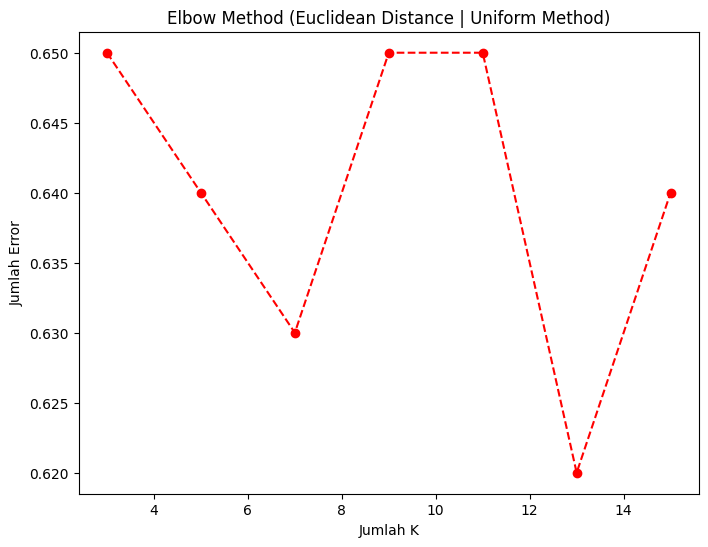

In [1060]:
errors = []
range_k = [3, 5, 7, 9, 11, 13, 15]

for k in range_k:
        model = KNN(k, 2, 'uniform')
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Euclidean Distance | Uniform Method)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

#### Manhattan Distance

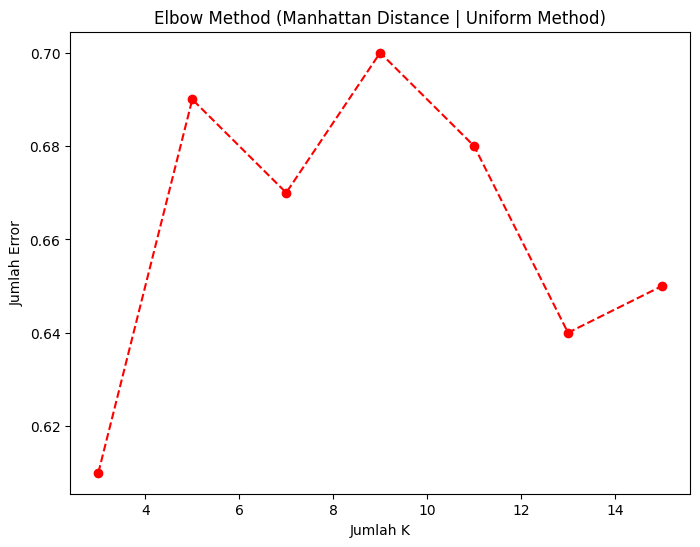

In [1061]:
errors = []
range_k = [3, 5, 7, 9, 11, 13, 15]

for k in range_k:
        model = KNN(k, 1, 'uniform')
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Manhattan Distance | Uniform Method)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

#### Chebyshev Distance

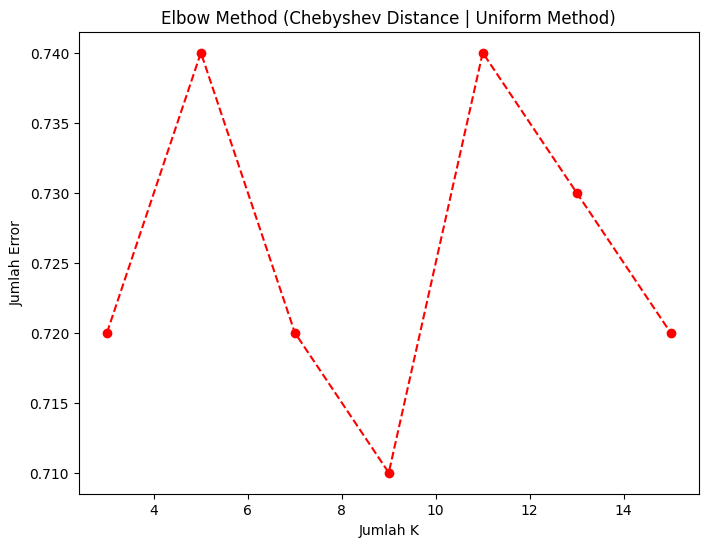

In [1062]:
errors = []
range_k = [3, 5, 7, 9, 11, 13, 15]

for k in range_k:
        model = KNN(k, 'chebyshev', 'uniform')
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Chebyshev Distance | Uniform Method)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

### D.8 Elbow Method Distance (Checking Optimal K)

#### Euclidean Distance

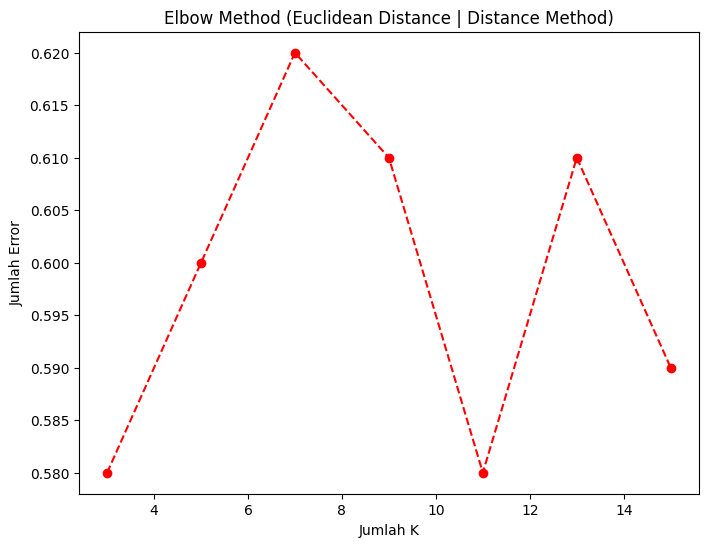

In [1063]:
errors = []
range_k = [3, 5, 7, 9, 11, 13, 15]

for k in range_k:
        model = KNN(k, 2, 'distance')
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Euclidean Distance | Distance Method)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

#### Manhattan Distance

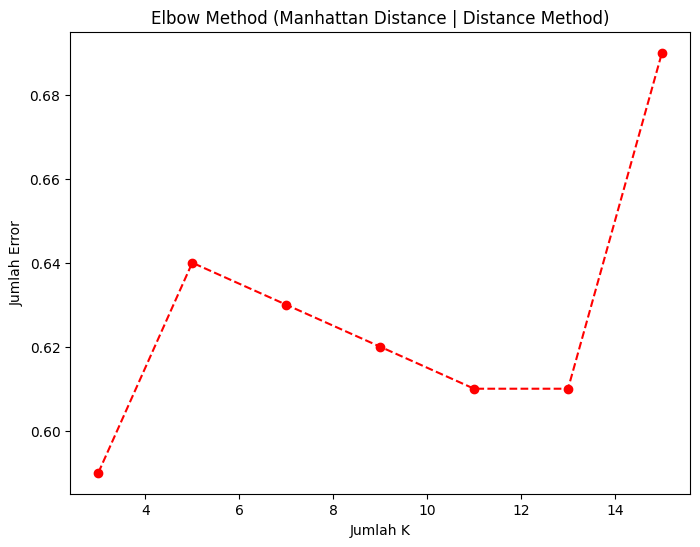

In [1064]:
errors = []
range_k = [3, 5, 7, 9, 11, 13, 15]

for k in range_k:
        model = KNN(k, 1, 'distance')
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Manhattan Distance | Distance Method)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

#### Chebyshev Distance

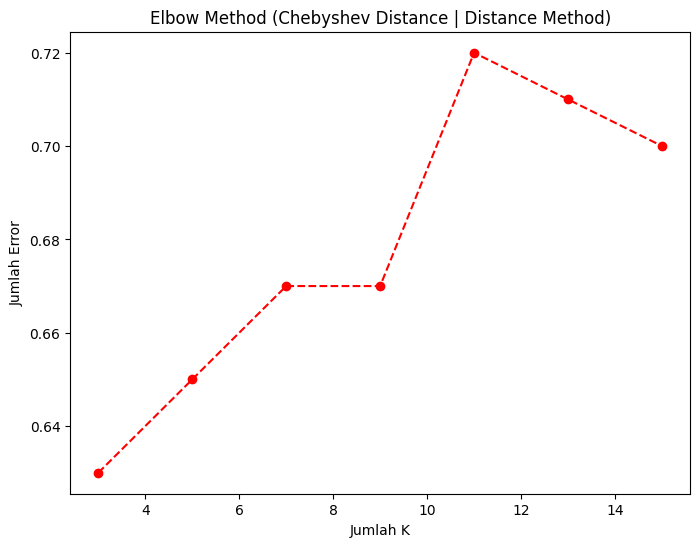

In [1065]:
errors = []
range_k = [3, 5, 7, 9, 11, 13, 15]

for k in range_k:
        model = KNN(k, 'chebyshev', 'distance')
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        error = np.mean(pred != y_test.values)
        errors.append(error)
        
plt.figure(figsize=(8,6))
plt.plot(range_k, errors, marker='o', linestyle='--', color='red')
plt.title("Elbow Method (Chebyshev Distance | Distance Method)")
plt.xlabel("Jumlah K")
plt.ylabel("Jumlah Error")
plt.show()

## E. Evaluasi

### E.1 Run Fungsi Prediksi Menggunakan Combo Terbaik

In [1066]:
model = KNN(3, 2, 'distance')
model.train(X_train.values, y_train.values)

In [1067]:
y_pred_test = model.predict(X_test.values)

In [1068]:
y_pred_train = model.predict(X_train.values)

### E.2 Akurasi Model

#### Akurasi Test

In [1069]:
test_accuracy = np.mean(y_pred_test == y_test.values)
test_accuracy

np.float64(0.42)

#### Akurasi Train

In [1070]:
train_accuracy = np.mean(y_pred_train == y_train.values)
train_accuracy
print(f"{train_accuracy:.2f}")

1.00


### E.3 Confusion Matrix

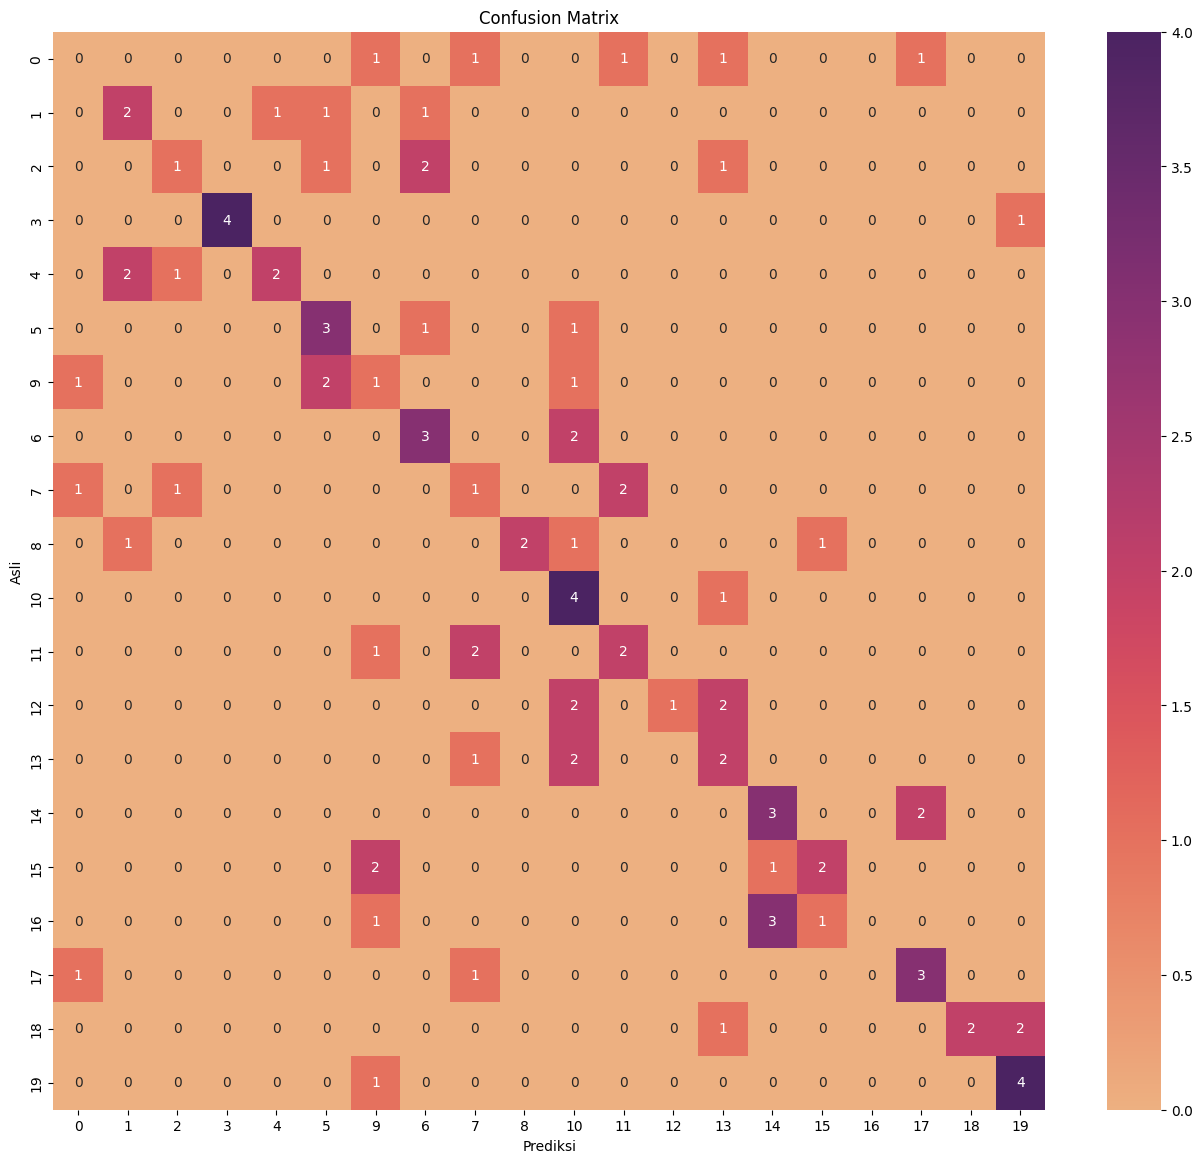

TP = 0, FP = 3, FN = 3, TN = 92
TP = 2, FP = 3, FN = 3, TN = 92
TP = 1, FP = 2, FN = 2, TN = 93
TP = 4, FP = 0, FN = 0, TN = 95
TP = 2, FP = 1, FN = 1, TN = 94
TP = 3, FP = 4, FN = 4, TN = 91
TP = 1, FP = 6, FN = 6, TN = 89
TP = 3, FP = 4, FN = 4, TN = 91
TP = 1, FP = 5, FN = 5, TN = 90
TP = 2, FP = 0, FN = 0, TN = 95
TP = 4, FP = 9, FN = 9, TN = 86
TP = 2, FP = 3, FN = 3, TN = 92
TP = 1, FP = 0, FN = 0, TN = 95
TP = 2, FP = 6, FN = 6, TN = 89
TP = 3, FP = 4, FN = 4, TN = 91
TP = 2, FP = 2, FN = 2, TN = 93
TP = 0, FP = 0, FN = 0, TN = 95
TP = 3, FP = 3, FN = 3, TN = 92
TP = 2, FP = 0, FN = 0, TN = 95
TP = 4, FP = 3, FN = 3, TN = 92


In [1071]:
label_name = df['HURUF'].unique()
n_classes = len(label_name)

cm = np.zeros((n_classes, n_classes), dtype=int)

for true, pred in zip(y_test.values, y_pred_test):
    cm[true][pred] += 1


TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)


plt.figure(figsize=(16,14))
sns.heatmap(cm, annot=True, cmap='flare', fmt='d', xticklabels=label_name, yticklabels=label_name)
plt.xlabel("Prediksi")
plt.ylabel("Asli")
plt.title("Confusion Matrix")

plt.show()
for i, name in enumerate(label_name):
    print(f"TP = {TP[i]}, FP = {FP[i]}, FN = {FP[i]}, TN = {TN[i]}")
    

### E.4 Precision

In [1072]:
with np.errstate(divide='ignore', invalid='ignore'):
    precision = TP / (TP + FP)
    w
precision = np.nan_to_num(precision)
precision = np.mean(precision)
precision
print(f"{precision:.2f}")

0.48


### E.5 Recall

In [1073]:
recall = TP / (TP + FN)
recall = np.mean(recall)
recall
print(f"{recall:.2f}")

0.42


### E.6 F-1 Score

In [1074]:
f1 = 2 * (precision * recall) / (precision + recall)
f1
print(f"{f1:.2f}")

0.45


### E.7 Visualisasi Decision Boundary

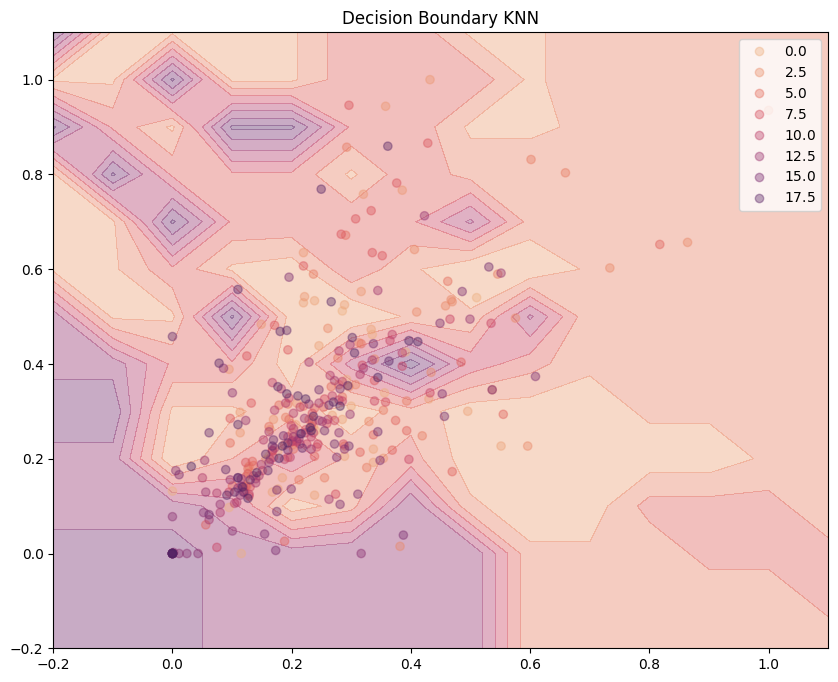

In [1075]:
x_mini = X_train.values[:, [5, 9]]
y_mini = y_train.values

model_vis = KNN(k=7, p=2, weights='uniform')
model_vis.train(x_mini, y_mini)

x_min, x_max = x_mini[:, 0].min() - 0.2, x_mini[:, 0].max() +  0.2
y_min, y_max = x_mini[:, 1].min() - 0.2, x_mini[:, 1].max() +  0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, z, cmap ='flare', alpha = 0.4)

gambar = plt.scatter(x_mini[:, 0], x_mini[:, 1], c = y_mini, cmap='flare', alpha =0.4)

plt.legend(*gambar.legend_elements(), loc='upper right')
plt.title("Decision Boundary KNN")
plt.show()

## F. GUI

### F.1 Rumus Prediksi Jarak Euclid

In [1076]:
# np.sqrt(np.sum((x1 - x2) ** 2))

### F.2 GUI Tkinter

In [1077]:
df.head(50)

,HURUF,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16
0,0,274,72,222,170,160,180,105,138,110,214,104,131,105,242,114,123
1,0,114,3,77,87,56,51,104,94,56,45,164,61,36,92,110,31
2,0,279,182,348,286,322,191,170,181,316,157,203,179,300,302,185,176
3,0,92,53,202,117,67,76,153,83,66,75,146,78,56,142,90,60
4,0,280,35,255,191,155,153,218,163,131,237,207,160,103,264,117,133
5,0,145,85,208,226,72,157,69,151,77,170,61,151,72,84,27,66
6,0,152,36,181,151,91,57,88,55,84,46,62,60,95,110,48,52
7,0,195,27,204,216,78,71,84,165,82,73,70,176,59,199,36,158
8,0,367,136,353,203,252,274,187,149,288,250,164,164,233,312,125,45
9,0,359,0,236,359,280,0,153,268,295,0,163,265,180,255,160,212


In [ ]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox


data_db = df.drop('HURUF', axis=1).values
label_db = df['HURUF'].values

vec_min = data_db.min(axis=0)
vec_max = data_db.max(axis=0)

data_db_norm = (data_db - vec_min) / (vec_max - vec_min)


def prediksi():
    try:
        input_user = np.array([float(e.get()) for e in input_entries])
        input_norm = (input_user - vec_min) / (vec_max - vec_min)
        
        jarak = np.sqrt(np.sum((data_db_norm - input_norm) ** 2, axis=1))
        
        k_indices = np.argsort(jarak)[:3]
        k_labels = label_db[k_indices]
        k_dists = jarak[k_indices]
        
        scores = {}
        for label, dist in zip(k_labels, k_dists):
            # Tambah 1e-9 biar gak error kalau jaraknya 0 (input sama persis data latih)
            weight = 1 / (dist + 1e-9)
            scores[label] = scores.get(label, 0) + weight
            
        hasil = max(scores, key=scores.get)
        label_hasil.config(text=f"{hasil}")
        
    except ValueError:
        messagebox.showerror("Error", "Harap isi semua kolom Z1-Z16 dengan angka!")
    except Exception as e:
        messagebox.showerror("Error", f"Terjadi kesalahan: {e}")


root = tk.Tk()
root.title("Aksara Jawa KNN")
root.geometry("400x620") 
root.config(bg="#1e3d59")

# Header
Label(root, text="Aksara Jawa Recognizer", font=('Arial', 18, 'bold'), fg='#1e3d59', bg="#f5f0e1", width=30, pady=10).pack()

# Area Input
frame_input = Frame(root, bg="#1e3d59")
frame_input.pack(pady=20)

input_entries = []
# Loop 16 Input
for i in range(16):
    row, col = i // 2, i % 2
    f = Frame(frame_input, bg="#1e3d59")
    f.grid(row=row, column=col, padx=10, pady=5)
    
    Label(f, text=f"Fitur Z{i+1}", font=('Arial', 9, 'bold'), fg='white', bg="#1e3d59").pack(anchor='w')
    e = Entry(f, width=15)
    e.pack()
    input_entries.append(e)

# Tombol & Hasil
Button(root, text='IDENTIFIKASI', font=('Arial', 12, 'bold'), bg='#ff6e40', fg='white', command=prediksi).pack(pady=10, ipadx=20)

Label(root, text="Hasil Prediksi:", font=('Arial', 10), fg='white', bg="#1e3d59").pack()
label_hasil = Label(root, text='-', font=('Arial', 24, 'bold'), fg='#ffc13b', bg="#1e3d59")
label_hasil.pack()

root.mainloop()

## Kesimpulan

### Insight Analysis

#### Data Overview
- Mempunyai 17 data int dan 1 data object
- Mempunyai 450 baris dan 18 columns
- Tidak mempunyai nilai hilang
- Data yang melebihi quantile 3 tetap di pertahankan

#### Data Preprocessing

- Hapus columns duplikat
- Drop columns "No", columns yang tidak diperlukan

#### Exploratory data analysis (EDA)

Univariate Analysis:
- Columns class tidak imbalanced, dan yang mendominasi adalah columns NA
- Distribusi Fitur miring ke kanan, dengan distribusi rata2 50 - 200

Bivariate Analysis:
- Pada analysis columns z6, huruf RA mempunyai rentang yang tinggi, huruf NYA mempunyai rentang yang rendah. (jadi lebih mudah untuk membedakan antara RA dan NYA)
- Pada analysis columns z10, huruf SA mempunyai rentang yang tinggi, huruf NYA mempunyai rentang yang rendah, dan sulit untuk membedakan huruf HA dan PA karena posisinya tumpang tindih. (jadi lebih mudah untuk membedakan antara SA dan NYA)

Multivariate Analysis:
- Korelasi antar fitur bernilai positif
- Korelasi fitur dengan label/target bernilai negatif
- Nilai Zoning yang memiliki korelasi tinggi dengan target adalah: Z6, Z10, Z11

### Insight Modelling

#### Standarisasi / Normalisasi

#### Manhattan / Euclidean / Chebyshev

#### Uniform Method / Distance Method